# Hands on neural network

## Neural network with Tensorflow : Face recognition

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load data
from sklearn.datasets import fetch_lfw_people
faces = fetch_lfw_people(min_faces_per_person=200, resize=0.25)

# 766 images of 31 * 23 pixel black & white
print(faces.images.shape)

(766, 31, 23)


In [2]:
# 2 different target classes
np.unique(faces.target)

array([0, 1])

Let's visualize some faces:

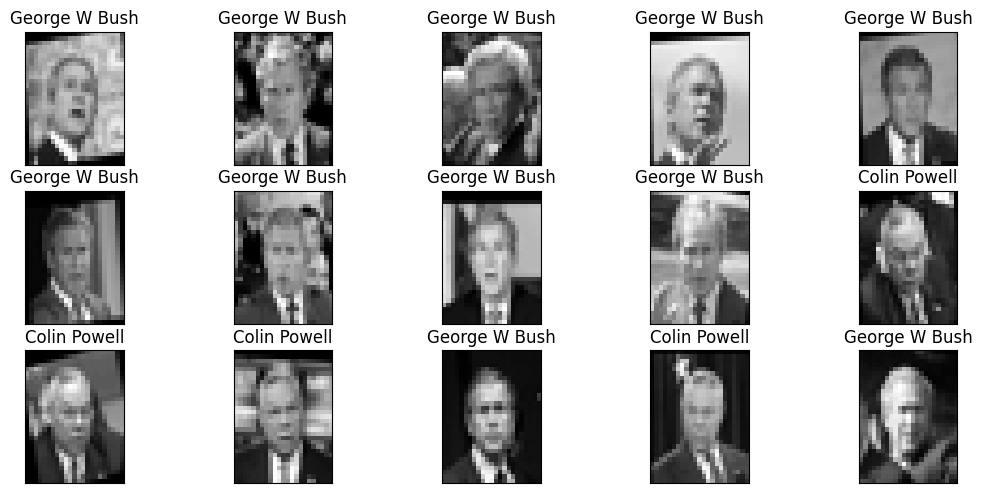

In [3]:
fig = plt.figure(figsize=(13,10))
for i in range(15):
    plt.subplot(5, 5, i + 1)
    plt.title(faces.target_names[faces.target[i]], size=12)
    plt.imshow(faces.images[i], cmap=plt.cm.gray)
    plt.xticks(()); plt.yticks(())

### Minimal preprocessing

In [4]:
# Flatten our 766 images
X = faces.images.reshape(766, 31*23)
X.shape

(766, 713)

In [5]:
y = faces.target
y.shape

(766,)

In [6]:
# Train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [7]:
# Standardize
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

### Simple model with two hidden layers

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

# Model definition
model = Sequential()
model.add(layers.Dense(20, activation='relu', input_dim=713))
model.add(layers.Dense(10, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()

2022-09-25 00:49:01.356061: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-09-25 00:49:01.964407: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-09-25 00:49:01.964434: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-25 00:49:02.039409: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


2022-09-25 00:49:03.564098: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-09-25 00:49:03.564223: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-09-25 00:49:03.564234: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


Model: "sequential"


_________________________________________________________________


 Layer (type)                Output Shape              Param #   


 dense (Dense)               (None, 20)                14280     


 dense_1 (Dense)             (None, 10)                210       


 dense_2 (Dense)             (None, 1)                 11        


Total params: 14,501


Trainable params: 14,501


Non-trainable params: 0


_________________________________________________________________


2022-09-25 00:49:05.260037: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/hostedtoolcache/Python/3.8.13/x64/lib
2022-09-25 00:49:05.260378: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-09-25 00:49:05.260407: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (fv-az39-120): /proc/driver/nvidia/version does not exist
2022-09-25 00:49:05.261298: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [9]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy', 
    metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size=16, epochs=20)

Epoch 1/20


 1/36 [..............................] - ETA: 20s - loss: 0.6332 - accuracy: 0.6875

36/36 [==============================] - 1s 1ms/step - loss: 0.5703 - accuracy: 0.7125


Epoch 2/20


 1/36 [..............................] - ETA: 0s - loss: 0.3965 - accuracy: 0.8750

36/36 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8780


Epoch 3/20


 1/36 [..............................] - ETA: 0s - loss: 0.3020 - accuracy: 0.9375

36/36 [==============================] - 0s 1ms/step - loss: 0.2336 - accuracy: 0.9390


Epoch 4/20


 1/36 [..............................] - ETA: 0s - loss: 0.1488 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.1469 - accuracy: 0.9756


Epoch 5/20


 1/36 [..............................] - ETA: 0s - loss: 0.1723 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0922 - accuracy: 0.9948


Epoch 6/20


 1/36 [..............................] - ETA: 0s - loss: 0.0341 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0602 - accuracy: 0.9983


Epoch 7/20


 1/36 [..............................] - ETA: 0s - loss: 0.0665 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0421 - accuracy: 0.9983


Epoch 8/20


 1/36 [..............................] - ETA: 0s - loss: 0.0108 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0296 - accuracy: 0.9983


Epoch 9/20


 1/36 [..............................] - ETA: 0s - loss: 0.0360 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0221 - accuracy: 0.9983


Epoch 10/20


 1/36 [..............................] - ETA: 0s - loss: 0.0068 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0170 - accuracy: 0.9983


Epoch 11/20


 1/36 [..............................] - ETA: 0s - loss: 0.0826 - accuracy: 0.9375

36/36 [==============================] - 0s 1ms/step - loss: 0.0135 - accuracy: 0.9983


Epoch 12/20


 1/36 [..............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0110 - accuracy: 0.9983


Epoch 13/20


 1/36 [..............................] - ETA: 0s - loss: 0.0117 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0093 - accuracy: 0.9983


Epoch 14/20


 1/36 [..............................] - ETA: 0s - loss: 0.0027 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0079 - accuracy: 0.9983


Epoch 15/20


 1/36 [..............................] - ETA: 0s - loss: 0.0059 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0068 - accuracy: 0.9983


Epoch 16/20


 1/36 [..............................] - ETA: 0s - loss: 0.0037 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0060 - accuracy: 0.9983


Epoch 17/20


 1/36 [..............................] - ETA: 0s - loss: 0.0028 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0053 - accuracy: 0.9983


Epoch 18/20


 1/36 [..............................] - ETA: 0s - loss: 0.0031 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0047 - accuracy: 0.9983


Epoch 19/20


 1/36 [..............................] - ETA: 0s - loss: 0.0040 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0042 - accuracy: 0.9983


Epoch 20/20


 1/36 [..............................] - ETA: 0s - loss: 0.0033 - accuracy: 1.0000

36/36 [==============================] - 0s 1ms/step - loss: 0.0038 - accuracy: 0.9983


### Evaluate performance

In [10]:
model.evaluate(scaler.transform(X_test), y_test)
# returns [loss, metrics]

1/6 [====>.........................] - ETA: 0s - loss: 0.1067 - accuracy: 0.9375

6/6 [==============================] - 0s 1ms/step - loss: 0.1645 - accuracy: 0.9427


[0.16451750695705414, 0.9427083134651184]

Is it good? What's our baseline?

In [11]:
pd.Series(y).value_counts()


1    530
0    236
dtype: int64

In [12]:
# Baseline score
530 / (530+236)

0.6919060052219321

### Let's check our predictions!

In [13]:
# Predicted probabilities
model.predict(scaler.transform(X_test))

1/6 [====>.........................] - ETA: 0s

6/6 [==============================] - 0s 1ms/step


array([[9.9583220e-01],
       [2.9062931e-04],
       [9.9994701e-01],
       [1.9842621e-03],
       [4.7357193e-05],
       [9.9726409e-01],
       [5.7926899e-01],
       [9.9999100e-01],
       [5.3733103e-05],
       [9.9999881e-01],
       [9.9987590e-01],
       [9.9999768e-01],
       [1.1850367e-02],
       [9.9997288e-01],
       [3.8435781e-01],
       [9.9997431e-01],
       [9.8346627e-01],
       [9.8748696e-01],
       [9.9980110e-01],
       [9.9997306e-01],
       [9.9970829e-01],
       [9.9998015e-01],
       [9.9975908e-01],
       [9.9997258e-01],
       [9.9998486e-01],
       [9.9996477e-01],
       [9.9971694e-01],
       [8.1768948e-01],
       [2.1566744e-01],
       [9.3615168e-01],
       [3.7395369e-04],
       [9.9980390e-01],
       [9.9999249e-01],
       [5.7842716e-04],
       [9.7446829e-01],
       [2.7319720e-01],
       [9.9119759e-01],
       [9.9412388e-01],
       [9.9865800e-01],
       [7.5736654e-01],
       [1.3247260e-06],
       [8.305581

## Linear regression with Tensorflow

## Logistic regression with Tensorflow